In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

In [2]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [3]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 49)                38465     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         39200     
                                                                 
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0784 - val_loss: 0.0778
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0784 - val_loss: 0.0778
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0784 - val_loss: 0.0778
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0784 - val_loss: 0.0778
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0784 - val_loss: 0.0778
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0784 - val_loss: 0.0777
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0784 - val_loss: 0.0778
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0784 - val_loss: 0.0777
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0784 - val_loss: 0.0777
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0784 - val_loss: 0.0

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [8]:
n = 10

imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

1/1 [==============================] - 0s 59ms/step


array([ 5.685252  ,  5.8379493 ,  5.2225666 ,  5.58531   ,  2.2459767 ,
        9.185732  , 15.717625  ,  6.169484  ,  4.3600893 ,  8.881497  ,
        6.8910737 ,  3.0271797 ,  2.4203959 ,  1.322702  ,  7.130004  ,
        3.6027899 ,  6.214487  ,  4.8386497 ,  9.226513  ,  7.332267  ,
        7.122777  ,  5.341046  ,  4.33284   ,  6.9598594 ,  4.444698  ,
        2.9363205 ,  6.4462023 ,  8.576308  ,  5.358999  ,  2.7507875 ,
        5.882762  ,  4.853847  ,  3.1482978 ,  8.985594  ,  2.8150823 ,
        7.8703995 ,  8.210268  ,  4.003126  ,  5.0077696 ,  4.7288346 ,
        6.1876245 , 12.301215  ,  4.753977  ,  7.3392553 ,  4.720315  ,
        0.53894174,  4.067057  ,  6.7086835 ,  5.816126  ], dtype=float32)

1/1 [==============================] - 0s 47ms/step


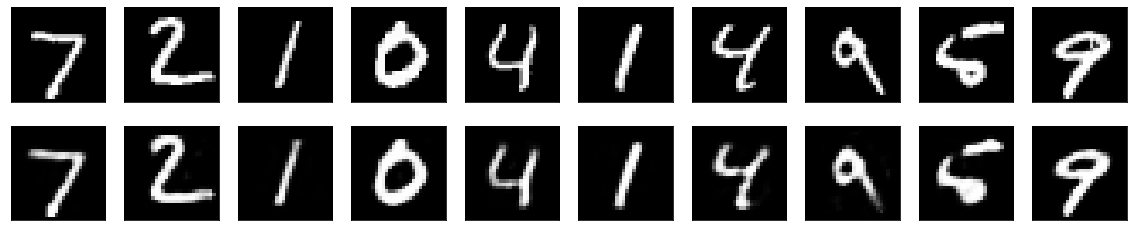

In [9]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)